# BINARIZING

## Thresholding

Let's say that we have gray scaled image and we want to convert it to black and white image. For this situation we'll be using thresholding. There are 6 different thresholding methods called binary, binary_inverse, trunc,tozero, tozero_inverse.
Let's examine them and see differences.

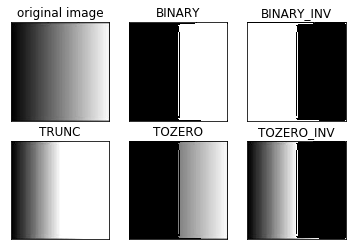

In [8]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

image=cv2.imread('gradient.JPG',0)

# we won't use firs output.
#threshold(image, threshold value, max value, method)

# Values below 127 goes to 0 (black, everything above goes to 255 (white)
_, thresh1=cv2.threshold(image,127,255,cv2.THRESH_BINARY)

# Values below 127 go to 255 and values above 127 go to 0 (reverse of above)
_, thresh2=cv2.threshold(image,127,255,cv2.THRESH_BINARY_INV)

# Values above 127 are truncated (held) at 127 (the 255 argument is unused)
_, thresh3=cv2.threshold(image,127,255,cv2.THRESH_TRUNC)

# Values below 127 go to 0, above 127 are unchanged  
_, thresh4=cv2.threshold(image,127,255,cv2.THRESH_TOZERO)

# Resever of above, below 127 is unchanged, above 127 goes to 0
_, thresh5=cv2.threshold(image,127,255,cv2.THRESH_TOZERO_INV)

titles=['original image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images=[image,thresh1,thresh2,thresh3,thresh4,thresh5]
for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()


There are other ways of binarizing, let's see them now.

## ADAPTIVE THRESHOLDING

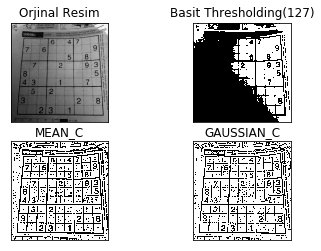

In [13]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img=cv2.imread('sudoku.JPG',0)

_, th1=cv2.threshold(img,127,255,cv2.THRESH_BINARY)
th2=cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,9,2)
th3=cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,9,2)

titles=['Orjinal Resim','Basit Thresholding(127)','MEAN_C','GAUSSIAN_C']
images=[img,th1,th2,th3]
for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()


As you can see, basic adaptive thresholding gives us a better solution for this image.

## OTSU THRESHOLDING

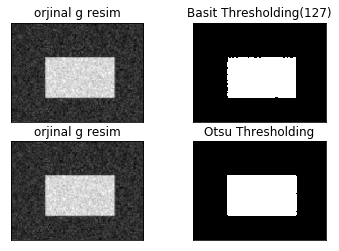

In [27]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img=cv2.imread('gurultuluresim.JPG',0)

_,th1=cv2.threshold(img,127,255,cv2.THRESH_BINARY)
_,th2=cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

images=[img,th1,
          img,th2]
titles=['orjinal g resim','Basit Thresholding(127)',
           'orjinal g resim','Otsu Thresholding']

for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()

## BLURING AND SHARPENING

If we want to understand filters, we need to know convolution. We'll try to teach convolution to you as simple as possible.
We are using convolution for blurring, sharpening, edge detection, noise reduction.
To implement Convolution process to the image, we need to find best kernel matrix for the image.
In the below, kernel matrix is suitable for sharpening.
We are adding zeros around the image for cover size of image.

![image](convolution.gif)

Convolving mask over image. It is done in this way. Place the center of the mask at each element of an image. Multiply the corresponding elements and then add them , and paste the result onto the element of the image on which you place the center of mask.

We have 3 different blurring function called mean, Gaussian, Median. 
- If your photo is taken at low light or have noise you can use gaussian blur.
- If your photo have salt and pepper noise, You can use median blur.
- To reduce noise while still maintaining edges, we can use bilateral blurring

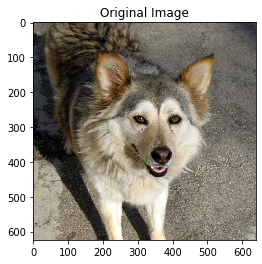

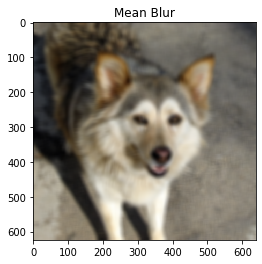

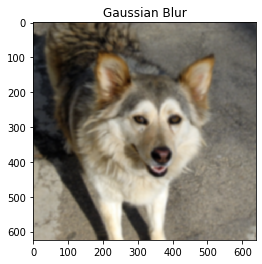

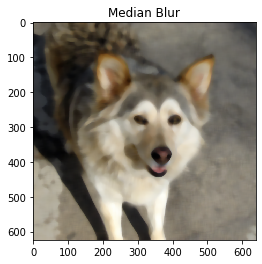

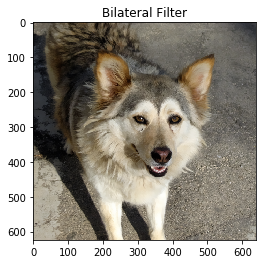

In [18]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

image = cv2.imread("dog.jpg")
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

plt.figure()
plt.title("Original Image")
plt.imshow(image)
plt.show()

kernel_size = 15 # you can use 3,5,7,11,13 ... values

# Mean Blur
blur = cv2.blur(image, (kernel_size, kernel_size))

plt.figure()
plt.title("Mean Blur")
plt.imshow(blur)
plt.show()

# Gaussian Blur
# GaussianBlur(image, (kernel_size, kernel_size), standard deviation of the Gaussian distribution)
blurred = cv2.GaussianBlur(image, (kernel_size, kernel_size), 0)

plt.figure()
plt.title("Gaussian Blur")
plt.imshow(blurred)
plt.show()

# Median Blur
blurred_2 = cv2.medianBlur(image, kernel_size)

plt.figure()
plt.title("Median Blur")
plt.imshow(blurred_2)
plt.show()

# Bilateral Filter
# bilateralFilter(image, diameter, color standard deviation, space standard deviation)
blurred_3 = cv2.bilateralFilter(image, 15, 15, 75)

plt.figure()
plt.title("Bilateral Filter")
plt.imshow(blurred_3)
plt.show()


By altering our kernels we can implement sharpening, which has the effects of in strengthening or emphasizing edges in an image.

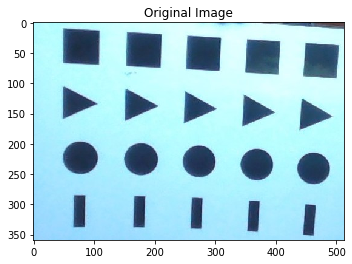

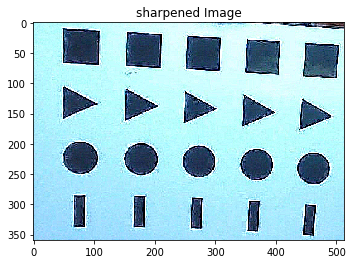

In [22]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

image = cv2.imread("figures.jpg")
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

plt.figure()
plt.title("Original Image")
plt.imshow(image)
plt.show()

# Create our shapening kernel, we don't normalize since the 
# the values in the matrix sum to 1
kernel_sharpening = np.array([[-1,-1,-1], 
                              [-1,9,-1], 
                              [-1,-1,-1]])

# applying different kernels to the input image
sharpened = cv2.filter2D(image, -1, kernel_sharpening)

plt.figure()
plt.title("sharpened Image")
plt.imshow(sharpened)
plt.show()

As you can see, we'll be using sharpening for edge detection.

## COLOR FILTER

If you want to detect specific color, you can use color filters. We will use HSV and RGB color space for color detection. First of all we have to adjust minimum and maximum values of red green blue.

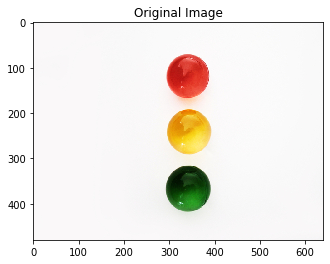

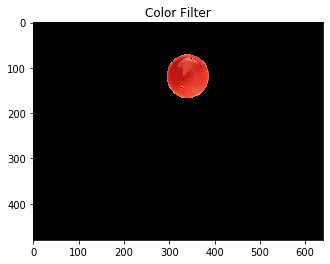

In [99]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

image = cv2.imread("stop.jpg")

rgb_image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

plt.figure()
plt.title("Original Image")
plt.imshow(rgb_image)
plt.show()

hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)


# this is hack for plotting with matplotlib

lower_red = np.array([0, 100, 20])
upper_red = np.array([10,255,255])

mask = cv2.inRange(hsv, lower_red, upper_red)
masked = cv2.bitwise_and(image, image, mask=mask)

last = cv2.cvtColor(masked,cv2.COLOR_BGR2RGB)

plt.figure()
plt.title("Color Filter")
plt.imshow(last)
plt.show()

You can also use RGB color spaces for color detection. But HSV space gives us better solution.

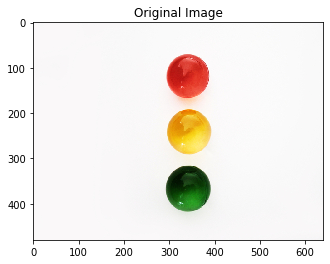

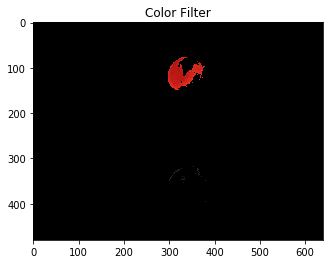

In [118]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

image = cv2.imread("stop.jpg")

rgb_image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

plt.figure()
plt.title("Original Image")
plt.imshow(rgb_image)
plt.show()

# blue, green, red
lower_red = np.array([15, 15, 0])
upper_red = np.array([50, 50, 255])

mask = cv2.inRange(image, lower_red, upper_red)
masked = cv2.bitwise_and(image, image, mask=mask)

last = cv2.cvtColor(masked,cv2.COLOR_BGR2RGB)

plt.figure()
plt.title("Color Filter")
plt.imshow(last)
plt.show()

If you have absolute red color (255), better to use RGB filter. Otherwise it gives us worse solution.

## EDGE DETECTION

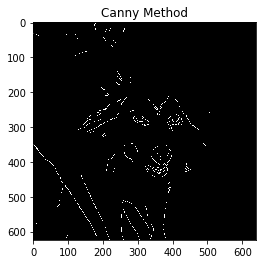

In [154]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

image = cv2.imread("dog.jpg",0)

# First of all we want to remove noises
# Asphalt have salt and pepper noise
# That's why we will use median blur
blurred = cv2.medianBlur(image, 7) 

# Sobel Edge Detection
# Detection on the X axis
# sobel(image, ddepth, x, y, kernel_size)
sobelx = cv2.Sobel(blurred, cv2.CV_64F, 1, 0, 5)

#cv2.imshow("sobelx", sobelx)
#cv2.waitKey()
#cv2.destroyAllWindows()

# Detection on the Y axis
sobely = cv2.Sobel(blurred, cv2.CV_64F, 0, 1, 5)
#cv2.imshow("sobely", sobely)
#cv2.waitKey()
#cv2.destroyAllWindows()

# Detection on the X and Y axis
sobelxy = cv2.Sobel(blurred, cv2.CV_64F, 1, 1, 5)
#cv2.imshow("sobelx,y", sobelxy)
#cv2.waitKey()
#cv2.destroyAllWindows()

edges = cv2.Canny(blurred,100,200)
edges = cv2.cvtColor(edges,cv2.COLOR_BGR2RGB)

plt.figure()
plt.title("Canny Method")
plt.imshow(edges)
plt.show()